#### Importing Libraries and Reading Data

- Load the possible libraries and define the load_data function to read the CSV file.

In [8]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Reading and checking the dataset
def load_data(path):
    try:
        data = pd.read_csv(path)
        return data
    except FileNotFoundError:
        print(f"The file {path} was not found.")
        return None

# Load the Iris dataset
data = load_data('data/iris.csv')

#### Descriptive Data Analysis: 

- Displays descriptive statistics and distributions of species classes in the dataset.

In [10]:
# Function to display the descriptive statistics of the dataset
def descriptive_analysis(date):
    desc_stats = data.describe()
    print("Descriptive Statistics:")
    print(desc_stats)
    
    # Class Distribution
    class_distribution = data['Species'].value_counts()
    print("\nClass Distribution:")
    print(class_distribution)

# Descriptive analysis
descriptive_analysis(data)

Descriptive Statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.790143      3.100191       3.551555      0.974830
std         0.880021      0.509612       1.597566      0.611870
min         4.020165      1.703493       1.110383     -0.030192
25%         5.121209      2.796246       1.525035      0.258596
50%         5.796505      3.091975       4.192494      1.124607
75%         6.480006      3.451938       4.787721      1.467420
max         8.224269      4.726366       6.030374      2.181208

Class Distribution:
Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


#### Visualizations:

- Generates boxplots, histograms, and scatterplots to explore data distribution.

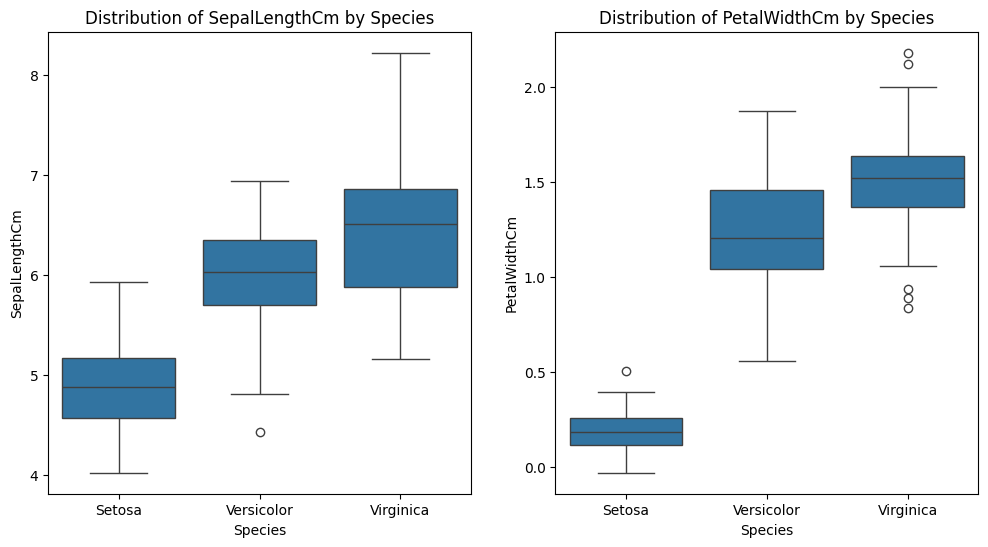

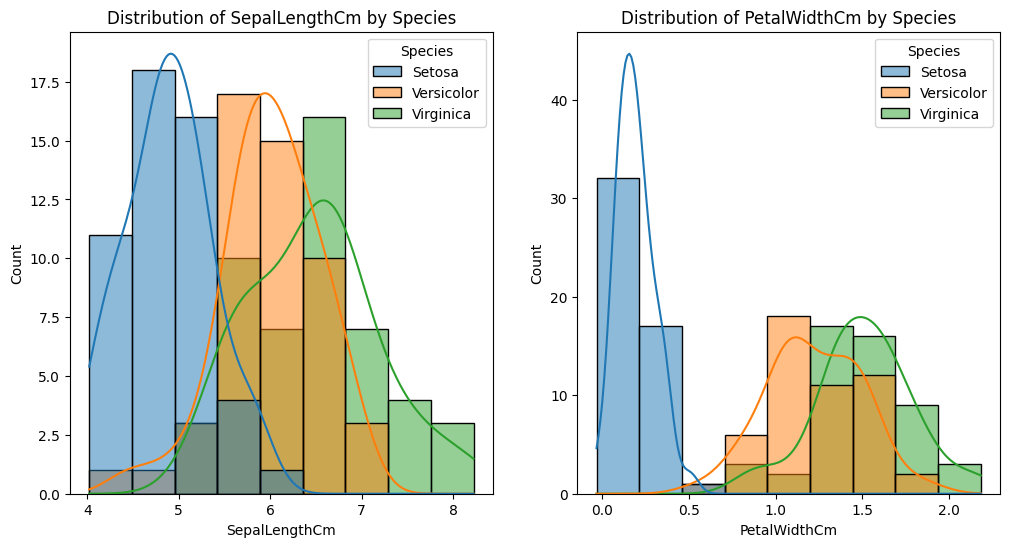

In [11]:
# Function to generate boxplot graphs and distributions
def plot_visualizations(data):
    plt.figure(figsize=(12, 6))
    
    # Boxplot of SepalLengthCm and PetalWidthCm by Species
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Species', y='SepalLengthCm', data=data)
    plt.title("Distribution of SepalLengthCm by Species")

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Species', y='PetalWidthCm', data=data)
    plt.title("Distribution of PetalWidthCm by Species")
    plt.show()

    # Histogram with KDE
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data, x='SepalLengthCm', hue='Species', kde=True, common_norm=False)
    plt.title("Distribution of SepalLengthCm by Species")

    plt.subplot(1, 2, 2)
    sns.histplot(data, x='PetalWidthCm', hue='Species', kde=True, common_norm=False)
    plt.title("Distribution of PetalWidthCm by Species")
    plt.show()

# Generate the views
plot_visualizations(data)

#### Correlation between Features and Scatterplots: 

- Displays the correlation matrix and the relationship between the length and width of the petals.


Correlation between Features:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.340024       0.735872      0.678933
SepalWidthCm       -0.340024      1.000000      -0.425043     -0.433178
PetalLengthCm       0.735872     -0.425043       1.000000      0.886952
PetalWidthCm        0.678933     -0.433178       0.886952      1.000000


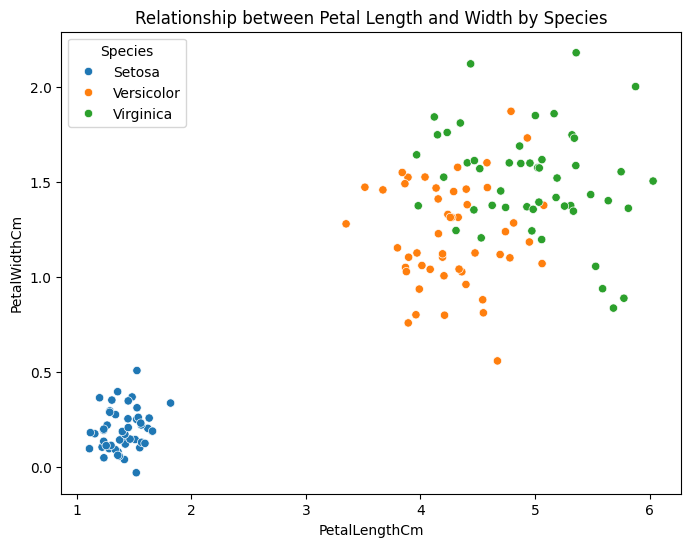

In [12]:
# Function to generate correlation graph and scatter plot
def analysis_correlation_and_dispersion(data):
    numeric_data = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    
    # Correlation between characteristics
    correlation = numeric_data.corr()
    print("\nCorrelation between Features:")
    print(correlation)
    
    # Scatterplot PetalLengthCm vs PetalWidthCm
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
    plt.title("Relationship between Petal Length and Width by Species")
    plt.show()

# Correlation and dispersion analysis
analysis_correlation_and_dispersion(data)

#### Data Pre-processing: 

- Separates the independent (features) and dependent (target) variables and normalizes the features.

In [6]:
# Function to pre-process the data: separation between features and target, and normalization
def preprocess_data(date):
    X = data.drop(columns=['Species'])
    y = data['Species']
    
    # Data normalization (important for SVM and KNN)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Preprocessing
X, y = preprocess_data(data)

#### Model Training and Evaluation: 

- Train three different models (Random Forest, SVM and KNN) and evaluate their performance with accuracy metrics, classification report and confusion matrix.

In [13]:
# Function to train and evaluate models
def train_and_evaluate_models(X, y):
    # Splitting data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Templates
    models = {
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier()
    }
    
    for name, model in models.items():
        print(f"Training model {name}...")
        model.fit(X_train, y_train)
        
        # Prediction
        y_pred = model.predict(X_test)
        
        # Model evaluation
        print(f"Model Evaluation {name}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 50)

# Training and evaluation of models
train_and_evaluate_models(X, y)

Training model Random Forest...
Model Evaluation Random Forest:
Accuracy: 0.8222
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.73      0.62      0.67        13
   Virginica       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45

Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  3 10]]
--------------------------------------------------
Training model SVM...
Model Evaluation SVM:
Accuracy: 0.9111
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.85      0.85      0.85        13
   Virginica       0.85      0.85      0.85        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91  

### Explanation of Model Evaluation Results

#### 1. **Random Forest:**

##### **Accuracy:** 0.8444
- **Accuracy** is the proportion of correct predictions compared to the total number of samples. In this case, the **Random Forest** model correctly classified 84.44% of the instances, which is a good performance for this type of classification task.

##### **Evaluation Metrics:**
The model also generated the following metrics for each class (flower species):

- **Precision**: Measures the accuracy of positive predictions for each class. In simple terms, it is the fraction of positive predictions that were correct.
  - **Setosa**: 1.00 → The model correctly predicted all Setosa samples.
  - **Versicolor**: 0.75 → 75% of Versicolor predictions were correct.
  - **Virginica**: 0.71 → 71% of Virginica predictions were correct.
  
- **Recall**: Measures the model's ability to identify all instances of each class. In other words, it is the fraction of positive examples that were correctly identified.
  - **Setosa**: 1.00 → The model correctly identified all Setosa instances.
  - **Versicolor**: 0.69 → The model identified 69% of Versicolor instances correctly.
  - **Virginica**: 0.77 → The model identified 77% of Virginica instances correctly.

- **F1-Score**: The harmonic mean of precision and recall. This metric provides a balance between precision and recall.
  - **Setosa**: 1.00 → Excellent balance between precision and recall.
  - **Versicolor**: 0.72 → The balance between precision and recall is not as strong as Setosa but still reasonable.
  - **Virginica**: 0.74 → The balance between precision and recall is fairly good.

- **Support**: Refers to the number of true instances for each class in the dataset.
  - **Setosa**: 19 samples
  - **Versicolor**: 13 samples
  - **Virginica**: 13 samples

##### **Confusion Matrix:**
The confusion matrix shows how the model classified the instances of each class. It is a table where:
- The rows represent the **true classes**.
- The columns represent the **predicted classes** by the model.

**Random Forest Confusion Matrix:**
```
[[19  0  0]   -> Setosa correctly classified (19)
 [ 0  9  4]   -> 9 Versicolor correctly classified, 4 incorrectly classified as Virginica
 [ 0  3 10]]  -> 3 Virginica misclassified as Versicolor, 10 correctly classified
```

---

#### 2. **SVM (Support Vector Machine):**

##### **Accuracy:** 0.9111
- The **accuracy** of the **SVM** model was 91.11%, meaning it correctly predicted 91.11% of the instances, showing superior performance compared to the Random Forest model.

##### **Evaluation Metrics:**
SVM also generated metrics for each class:

- **Precision**: The precision of the SVM model is higher compared to Random Forest.
  - **Setosa**: 1.00 → The model correctly predicted all Setosa instances.
  - **Versicolor**: 0.85 → The model correctly predicted 85% of Versicolor instances.
  - **Virginica**: 0.85 → The model correctly predicted 85% of Virginica instances.

- **Recall**: The SVM model was better at identifying all instances of each class.
  - **Setosa**: 1.00 → The model correctly identified all Setosa instances.
  - **Versicolor**: 0.85 → The model identified 85% of Versicolor instances correctly.
  - **Virginica**: 0.92 → The model identified 92% of Virginica instances correctly.

- **F1-Score**: The harmonic mean between precision and recall, which is more balanced with the SVM model:
  - **Setosa**: 1.00 → Excellent balance between precision and recall.
  - **Versicolor**: 0.85 → The model shows good balance.
  - **Virginica**: 0.88 → The average of precision and recall is quite high, indicating good model performance.

- **Support**: The number of true instances per class is the same as for the Random Forest model:
  - **Setosa**: 19 samples
  - **Versicolor**: 13 samples
  - **Virginica**: 13 samples

##### **Confusion Matrix:**
**SVM Confusion Matrix:**
```
[[19  0  0]   -> Setosa correctly classified (19)
 [ 0  9  4]   -> 9 Versicolor correctly classified, 4 misclassified as Virginica
 [ 0  1 12]]  -> 1 Virginica misclassified as Versicolor, 12 correctly classified
```

---

### Comparison Between Models:

- **Accuracy**: The **SVM** model had a higher accuracy (91.11%) than the **Random Forest** (84.44%), indicating that the SVM was more accurate in overall classification.

- **Precision, Recall, and F1-Score**: The **SVM** also outperformed the Random Forest in precision, recall, and F1-score, especially for the **Versicolor** and **Virginica** classes, where SVM's precision and recall were higher.

- **Confusion Matrix**: Both models made some mistakes in classifying **Versicolor** and **Virginica** (some instances were misclassified), but the **SVM** was better at avoiding errors in classifying Virginica, whereas the Random Forest made more mistakes in this class.

### Conclusion:
- The **SVM** proved to be superior to the **Random Forest** in terms of accuracy and several performance metrics. This can be attributed to the fact that SVM tends to be very effective for multi-class classification problems like Iris, where the classes are well-separated.

- The **Random Forest**, while performing well, showed a slight dip in metrics, particularly for the **Versicolor** and **Virginica** classes, where precision and recall were lower.